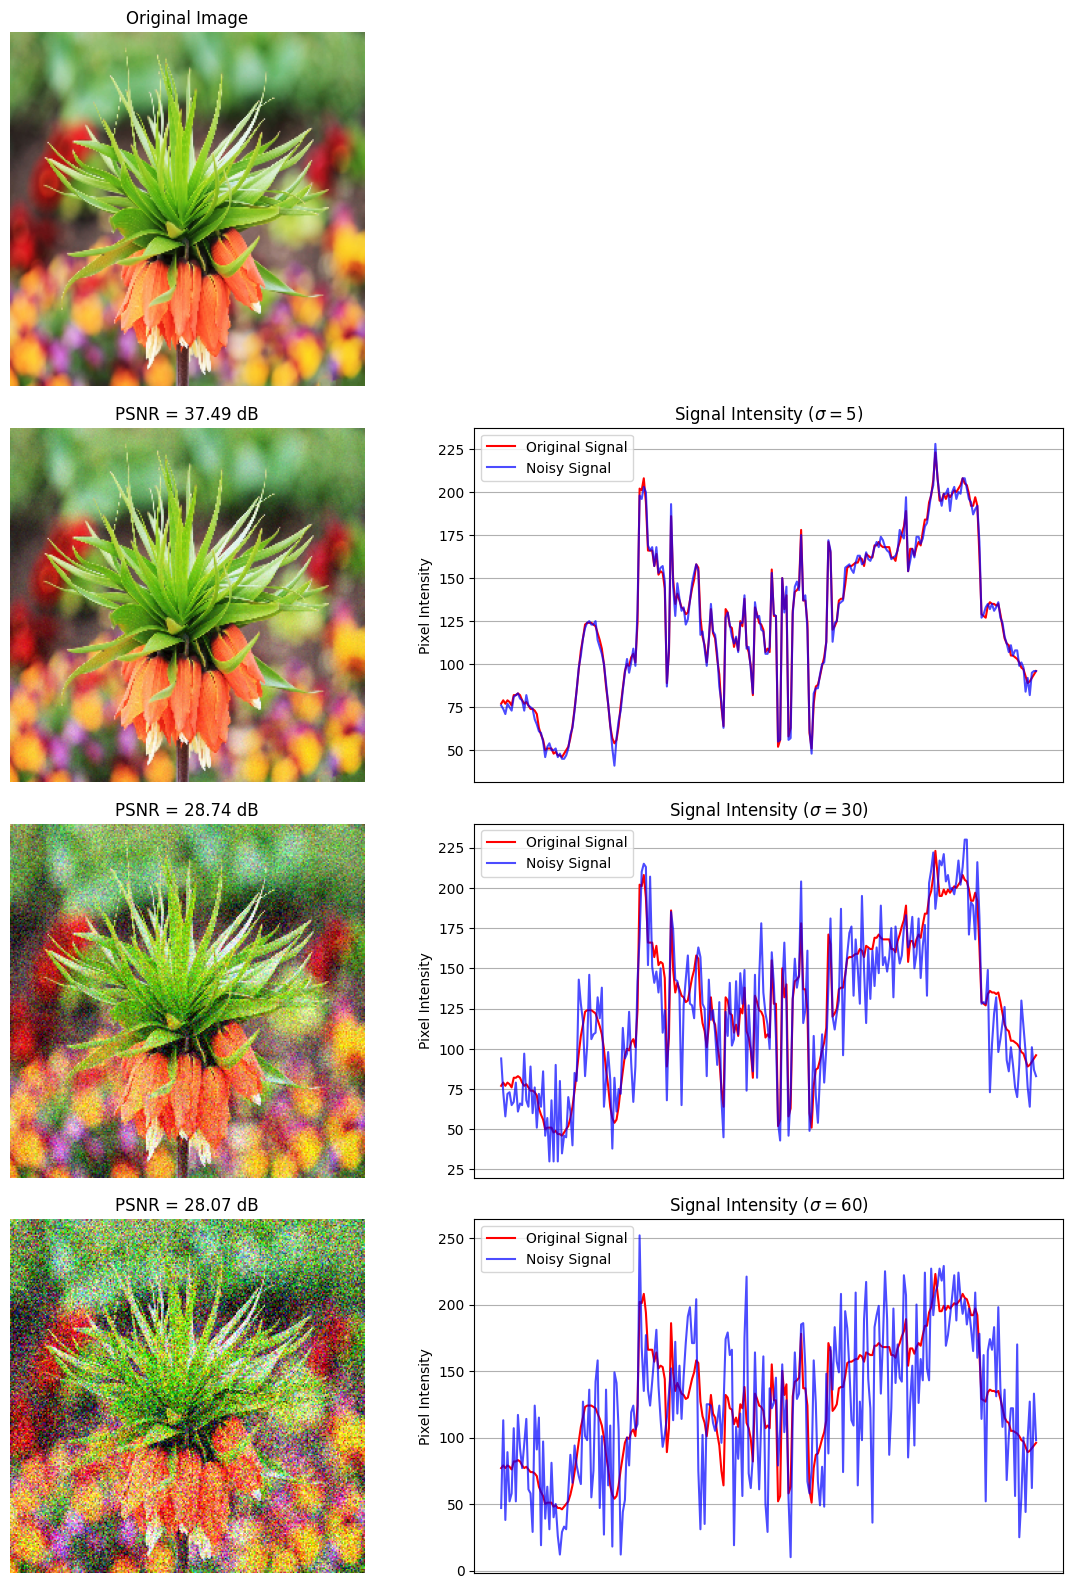

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image, sigma):
    """Add Gaussian noise to a color image."""
    noise = np.random.normal(0, sigma, image.shape)  # Create Gaussian noise
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)  # Ensure pixel values stay valid
    return noisy_image

# Load a color image (ensure the image is in color)
image_path = "/content/0803.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Resize the image for consistency
image = cv2.resize(image, (256, 256))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper color display

# Different sigma values corresponding to different noise levels (lower sigma = higher SNR)
sigma_values = [5, 30, 60]
noisy_images = []

# Generate noisy images
for sigma in sigma_values:
    noisy_img = add_gaussian_noise(image_rgb, sigma)
    noisy_images.append(noisy_img)

# Select a row (e.g., row 128) to plot the signal intensities
row_index = 128  # Choose a row for plotting intensity values
original_signal = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)[row_index]  # Grayscale version of the original image

# Create a plot with images on the left and intensity graphs on the right
fig, axes = plt.subplots(len(sigma_values) + 1, 2, figsize=(12, (len(sigma_values) + 1) * 4))

# Plot the original image at the top-left
axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Leave the top-right empty
axes[0, 1].axis("off")

# Plot the noisy images and their signal intensities
for i, (sigma, noisy_img) in enumerate(zip(sigma_values, noisy_images)):
    # Left side: Show the noisy color image
    axes[i + 1, 0].imshow(noisy_img)
    axes[i + 1, 0].set_title(f"PSNR = {20 * np.log10(255.0 / np.sqrt(np.mean((cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) - cv2.cvtColor(noisy_img, cv2.COLOR_RGB2GRAY)) ** 2))):.2f} dB")  # PSNR calculation
    axes[i + 1, 0].axis("off")

    # Right side: Plot the signal intensities for the noisy image
    noisy_signal = cv2.cvtColor(noisy_img, cv2.COLOR_RGB2GRAY)[row_index]
    axes[i + 1, 1].plot(original_signal, color='red', label='Original Signal')  # Red curve for the original
    axes[i + 1, 1].plot(noisy_signal, color='blue', label=f'Noisy Signal', alpha=0.7)  # Blue for noisy
    axes[i + 1, 1].set_title(f"Signal Intensity ($\sigma = {sigma}$)")  # Sigma notation
    axes[i + 1, 1].set_ylabel("Pixel Intensity")
    axes[i + 1, 1].legend()
    axes[i + 1, 1].grid(True)
    axes[i + 1, 1].set_xticks([])  # Remove x-axis ticks

# Adjust layout and display the plot
plt.tight_layout()
plt.show()